# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import json
with open("/content/reviews_Electronics_40.json") as f:
    data = json.load(f)

# Converting to dataframe

In [3]:
df=pd.DataFrame(data)

# Displaying the dataFrame

In [4]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
...,...,...,...,...,...,...,...,...,...
39995,A3CQI5ZO1IE5ZK,B00006GET1,"Rick Payton ""mauirixxx""","[0, 0]","The fan worked as it should, plugged right in ...",5,pleasing shade of blue,1125187200,"08 28, 2005"
39996,A248K8F4LZ4KPA,B00006GET1,"T. Lemelin ""Electronic toy connoisseur.""","[0, 0]","Good price, nifty blue glow, moves a decent am...",5,Good stuff.,1189814400,"09 15, 2007"
39997,A2248DSUUUX95G,B00006GF1G,Chi Nguyen,"[0, 0]",Good product & Good priceThis is a very good q...,5,Good product & Good price,1253750400,"09 24, 2009"
39998,A2K9UPZPFUM5G5,B00006GF1G,F.B.,"[7, 7]",I'm very happy with my purchase of these binoc...,5,Great for size and weight,1161907200,"10 27, 2006"


# Exploratory Data Analysis

### Finding No. of Null values in each feature of DataFrame

In [5]:
df.isna().sum()

reviewerID          0
asin                0
reviewerName      267
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

**Describing the DataFrame**

In [6]:
df.describe()

,overall,unixReviewTime
count,40000.000000,4.000000e+04
mean,4.280825,1.261244e+09
std,1.144594,1.325028e+08
min,1.000000,9.292320e+08
25%,4.000000,1.175126e+09
50%,5.000000,1.313453e+09
75%,5.000000,1.369440e+09
max,5.000000,1.405987e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      40000 non-null  object
 1   asin            40000 non-null  object
 2   reviewerName    39733 non-null  object
 3   helpful         40000 non-null  object
 4   reviewText      40000 non-null  object
 5   overall         40000 non-null  int64 
 6   summary         40000 non-null  object
 7   unixReviewTime  40000 non-null  int64 
 8   reviewTime      40000 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


**Droping the Helpful feature as it is not Important**

In [8]:
df.drop('helpful',axis=1,inplace=True)
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


**Printing the no. of Unique values in each feature**

In [9]:
for col in df:
  print("Total no of unique -------- {} is --------- {}:".format(col, len(df[col].unique())))


Total no of unique -------- reviewerID is --------- 30072:
Total no of unique -------- asin is --------- 1616:
Total no of unique -------- reviewerName is --------- 27462:
Total no of unique -------- reviewText is --------- 39978:
Total no of unique -------- overall is --------- 5:
Total no of unique -------- summary is --------- 32833:
Total no of unique -------- unixReviewTime is --------- 5147:
Total no of unique -------- reviewTime is --------- 5147:


**Creating 2 new Features of Word_Counts**

In [10]:
df['Word_counts']=df['reviewText'].apply(lambda x: len(str(x.split())))
df['Word_counts(Summary)']=df['summary'].apply(lambda x: len(str(x.split())))

In [11]:
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,Word_counts,Word_counts(Summary)
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013",1246,25
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010",3439,24
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010",7104,21
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",3596,36
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",1683,57


**Plot of Overall vs. Count**

Text(0.5, 1.0, 'overall Vs. Count')

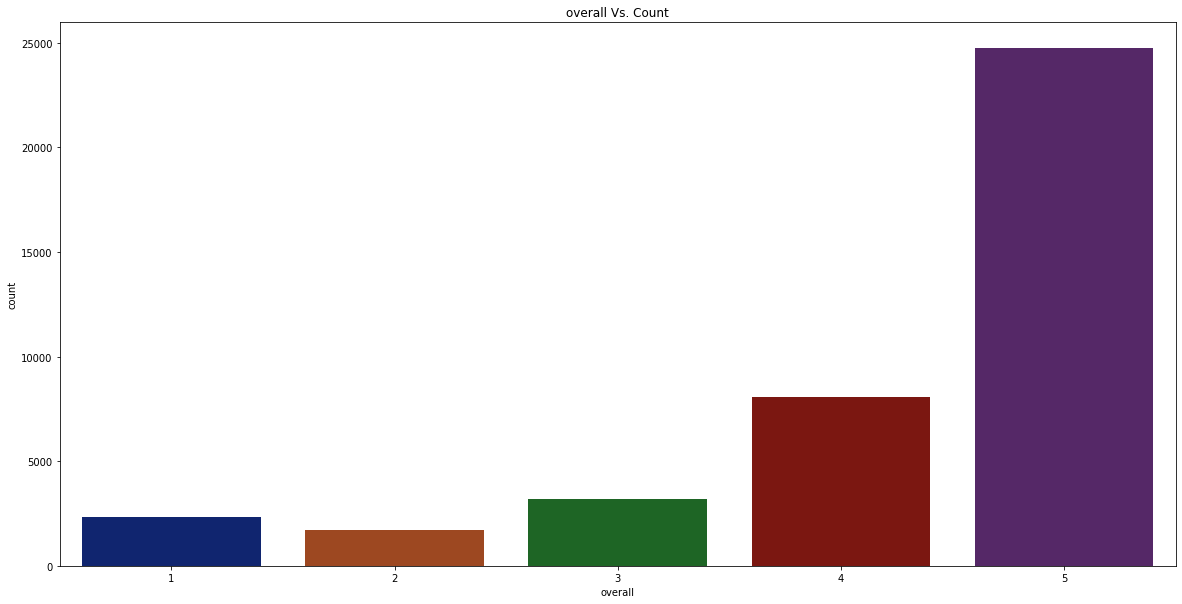

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x="overall", data=df , palette="dark")
plt.title('overall Vs. Count')

**Value Counts of Overall feature**

In [13]:
df['overall'].value_counts()

5    24749
4     8063
3     3178
1     2318
2     1692
Name: overall, dtype: int64

In [14]:
df['overall'] = np.where((df['overall'] < 3), 0, df.overall)
df['overall'] = np.where((df['overall'] > 3), 2, df.overall)
df['overall'] = np.where((df['overall'] == 3), 1, df.overall)

In [15]:
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,Word_counts,Word_counts(Summary)
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,2,Gotta have GPS!,1370131200,"06 2, 2013",1246,25
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",0,Very Disappointed,1290643200,"11 25, 2010",3439,24
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",1,1st impression,1283990400,"09 9, 2010",7104,21
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",3596,36
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,0,"Major issues, only excuses for support",1317254400,"09 29, 2011",1683,57


**Plot of Value Overall vs Count(After Imputation)**

Text(0.5, 1.0, 'Overall Vs. Count')

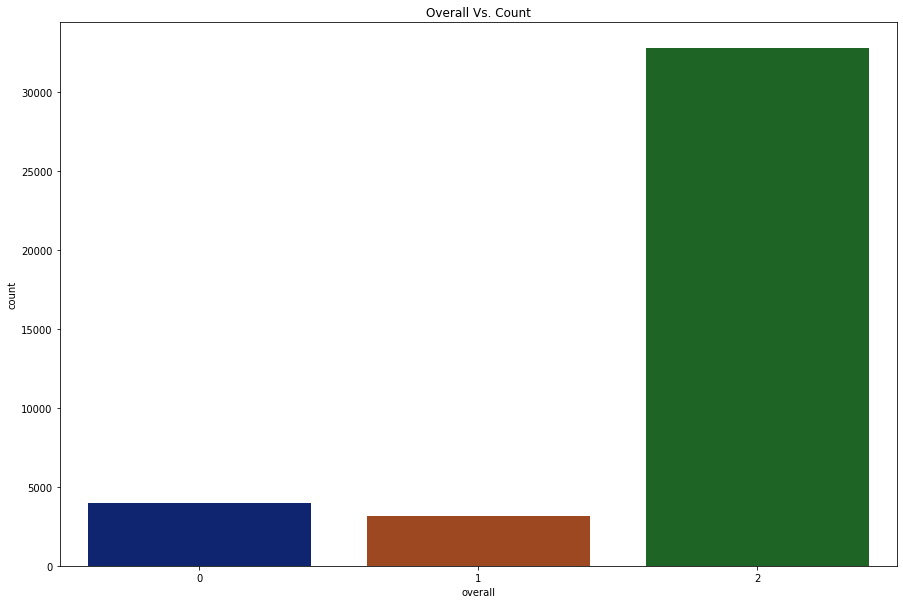

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="overall", data=df , palette="dark")
plt.title('Overall Vs. Count')

**Pie Plot**

Text(0.5, 1.0, 'Piechart showing distribution of Ratings')

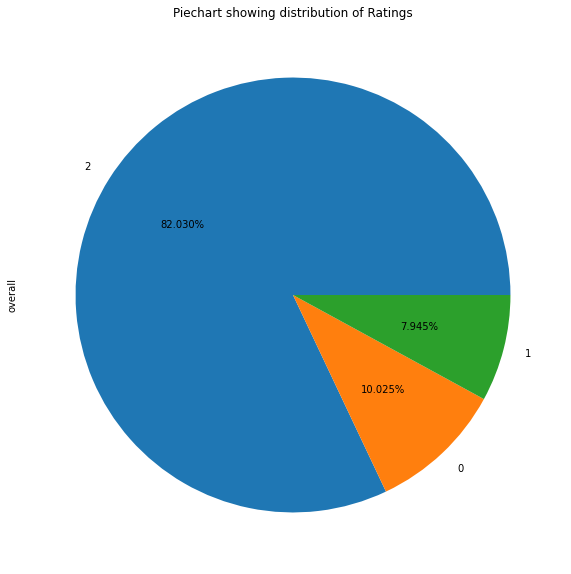

In [17]:
piedata = df['overall']
plt.figure(figsize=(15,10))
piedata.value_counts().plot(kind = 'pie',autopct = '%.3f%%')
plt.title('Piechart showing distribution of Ratings')

**Plot of Avg, No of Words in Positive , Negative and Neutral Reviews**

Text(0.5, 1.0, 'Avg no. of words in Reviews Vs. Overall')

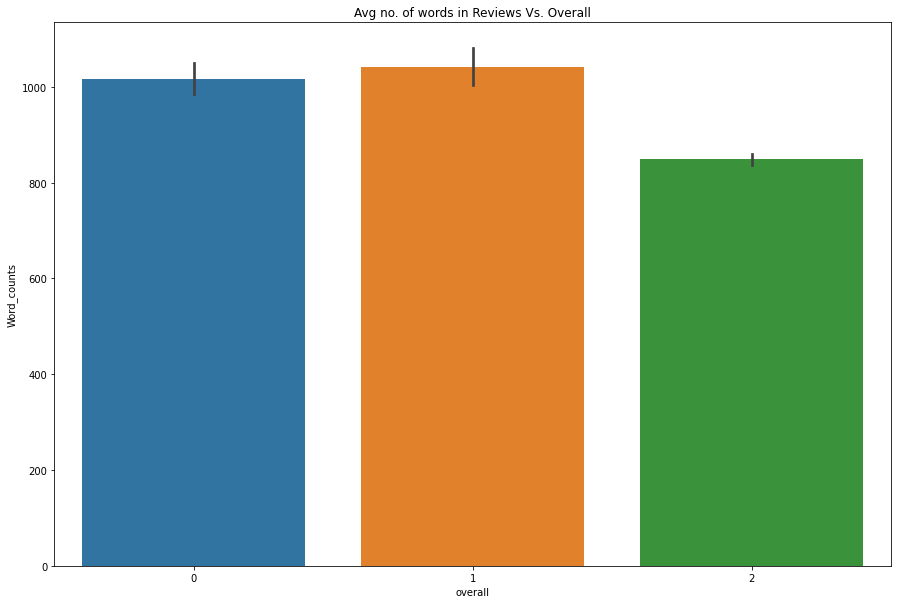

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x='overall', y='Word_counts', data=df)
plt.title('Avg no. of words in Reviews Vs. Overall')

# Data Preprocessing

**Dropping all unnecessary columns**

In [19]:
df.drop(['reviewerID','asin','reviewerName','summary','unixReviewTime','reviewTime','Word_counts','Word_counts(Summary)'],axis=1,inplace=True)

In [20]:
df.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,2
1,"I'm a professional OTR truck driver, and I bou...",0
2,"Well, what can I say. I've had this unit in m...",1
3,"Not going to write a long review, even thought...",0
4,I've had mine for a year and here's what we go...,0


## Importing NLTK and Other Necessary Libtraries for data Preprocessing

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
!pip install inflect
import inflect
p = inflect.engine()
!pip install contractions
import contractions

**Defining Preprocessing function**

In [23]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import gensim
import string
def text_Preprocessing(text):
  def remove_emoji(text):
    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0"u"\U000024C2-\U0001F251""]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
  reviews =[contractions.fix(text) for text in text]
  reviews =[text.lower() for text in reviews]
  reviews =[re.sub(r'\S+@\S+','',text) for text in reviews]
  reviews =[re.sub(r'\d+','',text) for text in reviews]
  reviews =[re.sub(r'[^\w\s]','',text) for text in reviews]
  reviews =[text.strip() for text in reviews]
  reviews =[remove_emoji(text) for text in reviews]
  stop_words=set(stopwords.words('english'))

  cleaned_reviews=[]
  for review in reviews:
    tokens =[word for word in word_tokenize(review) if not word in stop_words]
    cleaned_reviews.append(" ".join(tokens))

  lemmatizer = WordNetLemmatizer()
  lem_reviews=[]
  for review in cleaned_reviews:
    lem_reviews.append(" ".join(list(map(lemmatizer.lemmatize , word_tokenize(review)))))
    
  return lem_reviews

In [24]:
t=df['reviewText']
df['reviewText'] =text_Preprocessing(t)
df.head()

,reviewText,overall
0,got gps husband otr road trucker impressed shi...,2
1,professional otr truck driver bought tnd truck...,0
2,well say unit truck four day prior garmin nont...,1
3,going write long review even thought unit dese...,0
4,mine year got try route non truck route tellin...,0


# Vectorization (TF-IDF)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000, analyzer='word', ngram_range=(1,1), stop_words='english',use_idf=True)
train = tfidf.fit_transform(df['reviewText']).toarray()

In [26]:
#Dataframe of Unigrams after using Tfidf
matrix = pd.DataFrame(train,columns=tfidf.get_feature_names())
matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,ab,aberration,ability,able,absolute,absolutely,abuse,abused,ac,accept,acceptable,accepts,access,accessible,accessing,accessory,accident,accidental,accidentally,accidently,accommodate,accomplish,according,account,accuracy,accurate,accurately,accustomed,acer,achieve,acoustic,acquired,act,action,activate,active,activity,actual,...,wrap,wrapped,wrist,write,writer,writing,written,wrong,wrote,wusb,xbox,xd,xlr,xp,xsi,xt,xti,ya,yamaha,yard,yeah,year,yearold,yellow,yep,yes,yesterday,young,youtube,yr,zaurus,zeiss,zero,zip,zipper,zippered,zone,zoom,zoomed,zooming
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.080841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.061699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.066485,0.0,0.0,0.0,0.111240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081073,0.0,0.073380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.062058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.081873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

# Splitting Into Train and Test Set

In [27]:
from sklearn.model_selection import train_test_split
y=df['overall']
X_train, X_test, y_train, y_test = train_test_split(matrix, y,stratify=y,test_size=0.5)

# Support Vector Machine Classifier

In [28]:
from sklearn.svm import SVC
classifier= SVC(random_state=42)
classifier.fit(X_train[:10000],y_train[:10000])
prediction=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print('The accuracy SVM is : {}'.format(accuracy_score(y_test,prediction)))

The accuracy SVM is : 0.82945


# Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import MultinomialNB
Naive = MultinomialNB()
Naive.fit(X_train,y_train)
predictions_NB = Naive.predict(X_test)

print('The accuracy Naive Bayes is : {}'.format(accuracy_score(y_test,predictions_NB)))

The accuracy Naive Bayes is : 0.82685


#K-Means

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=3, random_state=0,n_init=11).fit(X_train,y_train)
predictions_KMeans=kmeans.predict(X_test)

print('The accuracy K-Means Algorithm is : {}'.format(accuracy_score(y_test,predictions_KMeans)))

The accuracy K-Means Algorithm is : 0.18855


#CONCLUSION:

1. As We see the best algorithm for classification of this dataset is SVM Classifier which gives accuracy of 83%.          .
2. Also since K-means is a clustering and an unsupervised Learning Algorithm it does not perform well for Supervised learning Classification task.
3. Based on the Models Prediction we can clearly state that if model predicts:
       0- Customer has seen a negative review on that product and wont buy the product in future.
       1- Customer has seen a neutral review on that product and may or may not buy the product in future.
       2- Customer has seen a positive review on that product and would surely buy the product in future.